In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB


In [2]:
# loading the data
spam_sms_data = pd.read_csv('spam.csv')

# inspect data
spam_sms_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data cleaning

In [3]:
spam_sms_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
spam_sms_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# check null values
spam_sms_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
# Check duplicates
spam_sms_data.duplicated().sum()

403

In [6]:
# drop duplicates
spam_sms_data = spam_sms_data.drop_duplicates(keep='first')

In [7]:
spam_sms_data.duplicated().sum()

0

In [8]:
spam_sms_data.shape

(5169, 2)

# EDA

In [9]:
spam_sms_data['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

([<matplotlib.patches.Wedge at 0x1f1fcbb91f0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

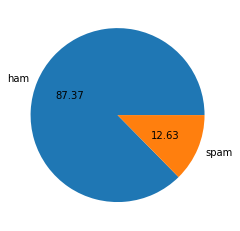

In [10]:
plt.pie(spam_sms_data['v1'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

In [11]:
# Data is highly imbalanced

In [12]:
spam_sms_data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4516   4516  I wanted to ask �_ to wait 4 me to finish lect...    1
spam   653    653  Thanks for your ringtone order, reference numb...    1

In [13]:
# Convert spam/ham into numerical data, and create a new column called 'spam'
spam_sms_data['spam'] = spam_sms_data['v1'].apply(lambda x: 1 if x == 'spam' else 0)

<ipython-input-13-d0c9e72d80e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_sms_data['spam'] = spam_sms_data['v1'].apply(lambda x: 1 if x == 'spam' else 0)


In [14]:
spam_sms_data

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will �_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [15]:
import nltk

In [16]:
!pip install nltk

In [17]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Francis I
[nltk_data]     Chebo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# no. of characters used
spam_sms_data['num_characters']=spam_sms_data['v2'].apply(len)

<ipython-input-18-b2053df60ef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_sms_data['num_characters']=spam_sms_data['v2'].apply(len)


In [19]:
spam_sms_data.head()

,v1,v2,spam,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [20]:
# num of words used
spam_sms_data['num_words']=spam_sms_data['v2'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-20-4f47b0ab0fec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_sms_data['num_words']=spam_sms_data['v2'].apply(lambda x: len(nltk.word_tokenize(x)))


In [21]:
spam_sms_data.head()

,v1,v2,spam,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [22]:
spam_sms_data['num_sentences']=spam_sms_data['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-22-325c30009f3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_sms_data['num_sentences']=spam_sms_data['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [23]:
spam_sms_data.head()

,v1,v2,spam,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [24]:
spam_sms_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
spam_sms_data[spam_sms_data['spam']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
spam_sms_data[spam_sms_data['spam']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

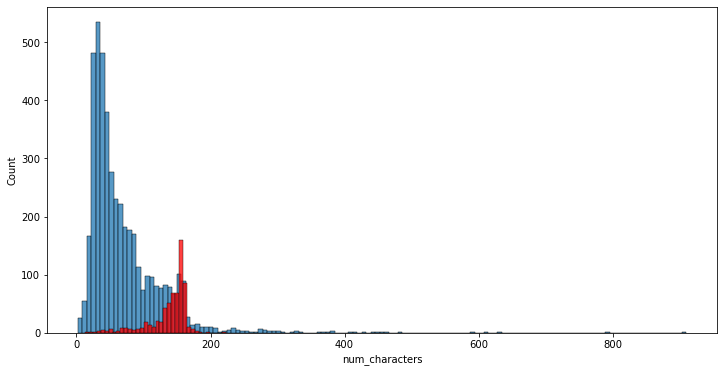

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(spam_sms_data[spam_sms_data['spam']==0]['num_characters'])
sns.histplot(spam_sms_data[spam_sms_data['spam']==1]['num_characters'], color='red')

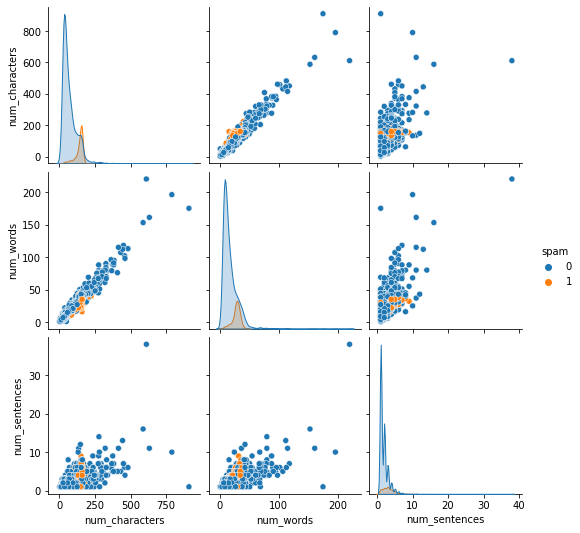

In [28]:
sns.pairplot(spam_sms_data, hue='spam')

<AxesSubplot:>

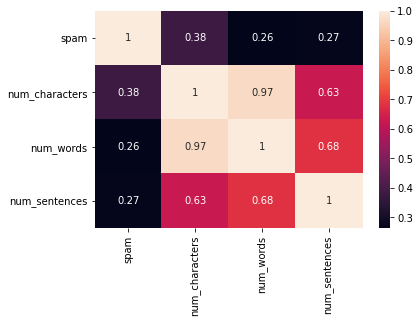

In [29]:
sns.heatmap(spam_sms_data.corr(), annot=True)

# Data Preprocessing
#lowercase
#Tokenizing
#Removing special characters
#Stemming

In [30]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Francis I
[nltk_data]     Chebo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
spam_sms_data['v2'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
# Stemming
from nltk.stem.porter import PorterStemmer
porterstem = PorterStemmer()
porterstem.stem('Dancing')

'danc'

In [35]:
def transform_text(v2):
    text = v2.lower() # lowercase
    text = nltk.word_tokenize(text) # tokenize words
    
    # Removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        
    # removing stopwords
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(porterstem.stem(i))


    return "".join(y)

In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonnahomesoonwanttalkstuffanymortonightkcrienoughtoday'

In [37]:
spam_sms_data["transformed_text"]=spam_sms_data["v2"].apply(transform_text)

<ipython-input-37-0c7efde3b407>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_sms_data["transformed_text"]=spam_sms_data["v2"].apply(transform_text)


In [38]:
spam_sms_data.head()

,v1,v2,spam,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,gojurongpointcraziavailbugingreatworldlaebuffe...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,oklarjokewifuoni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,freeentri2wklicompwinfacupfinaltkt21stmaytextf...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,udunsayearlihorucalreadisay
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nahthinkgoeusflivearoundthough


In [39]:
#!pip install wordcloud


In [40]:
# worldcloud of spam texts
from wordcloud import WordCloud

wordcld = WordCloud(width=900, height=700, min_font_size=10, max_words=200, background_color='white')

In [41]:
spam_wordcld = wordcld.generate(spam_sms_data[spam_sms_data['spam'] == 1]['transformed_text'].str.cat(sep=" "))

In [42]:
plt.figure(figsize=(12,9))
plt.show(spam_wordcld)

<Figure size 864x648 with 0 Axes>

In [43]:
ham_wordcld = wordcld.generate(spam_sms_data[spam_sms_data['spam'] == 0]['transformed_text'].str.cat(sep=" "))

In [44]:
plt.figure(figsize=(12,9))
plt.show(ham_wordcld)

<Figure size 864x648 with 0 Axes>

In [45]:
spam_corpus = []
for message in spam_sms_data[spam_sms_data['spam']==1]['transformed_text'].tolist():
    for words in message.split():
        spam_corpus.append(words)

In [46]:
len(spam_corpus)

653

In [47]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(40))


,0,1
0,congrat1yearspecialcinemapass2call09061209465c...,2
1,genttricontactlastweekenddrawshowprizeguarante...,2
2,tricontactreplioffervideohandset750anytimnetwo...,2
3,decembmobilentitlupdatlatestcolourcameramobilf...,2
4,callgermani1pencperminutcallfixlineviaaccessnu...,2
5,valentindayspecialwinquiztakepartnertriplifeti...,2
6,sendlogo2urlover2namejoinhearttxtlovename1name...,2
7,guarantelatestnokiaphone40gbipodmp3playerprize...,2
8,urgentcall09066350750landlincomplimentari4ibiz...,2
9,usecretadmirlook2makecontactrrevealthinkur,2


C:\Users\Francis I Chebo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


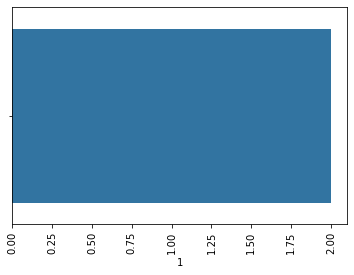

In [48]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
#x =spam_sms_data.v2
#y = spam_sms_data.spam


# Naive bayes algorithm

In [50]:
# find word count and store data as matrix
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [51]:
X=tfidf.fit_transform(spam_sms_data['transformed_text']).toarray()

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_x = sc.fit_transform(X)

In [53]:
y=spam_sms_data['spam'].values
y.shape

(5169,)

In [54]:
# split training and testing data
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y, test_size=0.2, random_state=2)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:

#x_train_count = tfidf.fit_transform(x_train.values, y_train.values.ravel())

In [56]:
#x_train_count

In [57]:
#test=cv.transform(x_test)

In [58]:
#x_train_count.toarray()

In [59]:
# find features(unique words)
#cv.get_feature_names()

In [60]:
# Train the model
# I'm using multinomialNB because features are text while gausianis used when features are numerical
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [61]:
predictions = mnb.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
predList=list(zip(predictions, y_test))
predList

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 

In [63]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
score=accuracy_score(y_test, predictions)
score

0.8665377176015474

In [64]:
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)

bnb_pred1 = accuracy_score(bnb_pred, y_test)
print(bnb_pred1)

0.8665377176015474


In [65]:
# Pretest ham
#sms_ham = ['Hey, wanna meet up for the game']
#sms_ham_count = cv.transform(sms_ham)
#prediction=mnb.predict(sms_ham_count)
#print(prediction[0])
#if (prediction[0]==0):
#    print("Message is ham")
#else:
#    print("Message is spam")

In [66]:
# Pretest spam
#sms_spam = ['reward money click']
#sms_spam_count = cv.transform(sms_spam)
#predict_msg=mnb.predict(sms_spam_count)
#print(predict_msg[0])
#if (predict_msg[0]==0):
#    print("Message is ham")
#else:
#    print("Message is spam")

In [67]:
# Test model evaluation
#x_test_count = cv.transform(x_test)
#mnb.score(x_test_count, y_test)

In [68]:
#I will pick multinomialNb for tfidf

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mn = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [71]:
clfs = {
    'Support_Vector_Classifier': svc,
    'KNeighbors_Classifier': knc,
    'MultinomialNB':mn,
    'Decision_Tree_Classifier': dtc,
    'Logistic_Regression_Classifier': lrc,
    'Random_Forest_Classifier': rfc,
    'AdaBoost_Classifier': abc,
    'Bagging_Classifier': bc,
    'Extra_Trees_Classifier': etc,
    'Gradient_Boosting_Classifier': gbdt,
    'XGB_Classifier':xgb
}

In [72]:

def classifier(clfs, x_train, y_train, x_test, y_test):
    clfs.fit(x_train, y_train)
    y_pred = clfs.predict(x_test)
    accuracy = round(accuracy_score(y_pred, y_test), 2)*100
    
    return accuracy

In [73]:
print(classifier(svc, x_train, y_train, x_test, y_test))

87.0


In [74]:
accuracy_scores = []

for name, clfs in clfs.items():
    current_accuracy = classifier(clfs, x_train, y_train, x_test, y_test)
    
    print('For', name)
    print('Accuracy', current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For Support_Vector_Classifier
Accuracy 87.0
For KNeighbors_Classifier
Accuracy 87.0
For MultinomialNB
Accuracy 87.0
For Decision_Tree_Classifier
Accuracy 87.0
For Logistic_Regression_Classifier
Accuracy 87.0
For Random_Forest_Classifier
Accuracy 87.0
For AdaBoost_Classifier
Accuracy 87.0
For Bagging_Classifier
Accuracy 87.0
For Extra_Trees_Classifier
Accuracy 87.0
For Gradient_Boosting_Classifier
Accuracy 87.0
For XGB_Classifier
Accuracy 87.0


In [75]:
performance = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores
}).sort_values(by=['Accuracy'], ascending=[False, True])


AttributeError: 'XGBClassifier' object has no attribute 'keys'

In [ ]:
performance_sms_detect = pd.melt(performance, id_vars = 'Algorithm')
performance_sms_detect

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable', data = performance_sms_detect, kind='bar', height='6')
plt.ylim(0.5,1.0)
plt.xtick(rotation='vertical')
plt.show()